# Projet 5   :         Optimisation de la gestion des données d'une boutique 
__________

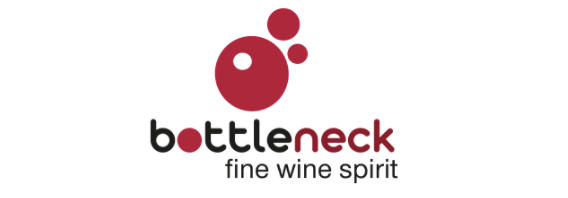

______
## Sommaire :
________

### Partie 1 : Préparation et nettoyage des DataFrames avant analyse des donnéees

**1. Etapes préliminaires**  

**2. Vérification de l'unicité des clés des DataFrames et nettoyage**  
   * A) Analyse des dataframes  
   * B) Nettoyage des DataFrames
   * C) Vérification des DataFrames post-nettoyage  
   
**3. Préparation des DataFrames pour pouvoir analyser les données**

   * A) Modification des DataFrames pour l'analyse de données
   * B) Création de la DataFrame sur laquelle on va étudier les données 

### Partie 2 : Analyse des données

**1. Quelques chiffres intéressants** 

* CA par produit
* CA total
* Prix moyen produit
* Prix médian
* Proportion de produit Vendus / Invendus
* Tops et flops des produits

**2. Etude de la variable prix (représentation et détection des outliers)**  

   * A) Etude par la méthode Z score
   * B) Etude par la méthode des interquartiles
   * C) Vérification des outliers
_______

____________
## <font color='red'> Partie 1 : </font> Préparation et nettoyage des DataFrames avant analyse des données </font>
___________________

## <font color='green'>1. Etapes préliminaires : </font>

Import des librairies nécessaires :

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

Création des dataframes à partir des fichiers CSV :

In [2]:
erp = pd.read_csv("C:\\Users\\NK\\Desktop\\erp.csv", sep=";")
web = pd.read_csv("C:\\Users\\NK\\Desktop\\web.csv", sep=";",encoding = 'latin-1')
liaison = pd.read_csv("C:\\Users\\NK\\Desktop\\liaison.csv", sep=";")

Check des dataframes :

In [3]:
web.head()

,sku,virtual,downloadable,rating_count,average_rating,total_sales,tax_status,tax_class,post_author,post_date,...,post_name,post_modified,post_modified_gmt,post_content_filtered,post_parent,guid,menu_order,post_type,post_mime_type,comment_count
0,bon-cadeau-25-euros,0,0,0,0.0,10.0,taxable,NaN,1.0,2018-06-01 13:53:46,...,bon-cadeau-de-25-euros,2018-06-01 14:13:57,2018-06-01 12:13:57,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
1,15298,0,0,0,0.0,6.0,taxable,NaN,2.0,2018-02-08 12:58:52,...,pierre-jean-villa-saint-joseph-preface-2018,2019-12-30 09:30:29,2019-12-30 08:30:29,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
2,15296,0,0,0,0.0,0.0,taxable,NaN,2.0,2018-02-08 13:49:41,...,pierre-jean-villa-saint-joseph-tilde-2017,2019-12-21 09:00:17,2019-12-21 08:00:17,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
3,15300,0,0,0,0.0,0.0,taxable,NaN,2.0,2018-02-08 14:08:36,...,pierre-jean-villa-croze-hermitage-accroche-coe...,2020-06-26 18:15:03,2020-06-26 16:15:03,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
4,19814,0,0,0,0.0,3.0,taxable,NaN,2.0,2018-02-09 14:01:05,...,pierre-jean-villa-igp-gamine-2018,2020-01-04 16:36:01,2020-01-04 15:36:01,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0


In [4]:
web.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1513 entries, 0 to 1512
Data columns (total 28 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   sku                    1428 non-null   object 
 1   virtual                1513 non-null   int64  
 2   downloadable           1513 non-null   int64  
 3   rating_count           1513 non-null   int64  
 4   average_rating         1430 non-null   float64
 5   total_sales            1430 non-null   float64
 6   tax_status             716 non-null    object 
 7   tax_class              0 non-null      float64
 8   post_author            1430 non-null   float64
 9   post_date              1430 non-null   object 
 10  post_date_gmt          1430 non-null   object 
 11  post_content           0 non-null      float64
 12  post_title             1430 non-null   object 
 13  post_excerpt           716 non-null    object 
 14  post_status            1430 non-null   object 
 15  comm

In [5]:
erp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 825 entries, 0 to 824
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   product_id      825 non-null    int64 
 1   onsale_web      825 non-null    int64 
 2   price           825 non-null    object
 3   stock_quantity  825 non-null    int64 
 4   stock_status    825 non-null    object
dtypes: int64(3), object(2)
memory usage: 32.4+ KB


In [6]:
liaison.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 825 entries, 0 to 824
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   product_id  825 non-null    int64 
 1   id_web      734 non-null    object
dtypes: int64(1), object(1)
memory usage: 13.0+ KB


In [7]:
liaison.head()

,product_id,id_web
0,3847,15298
1,3849,15296
2,3850,15300
3,4032,19814
4,4039,19815


In [8]:
web.head()

,sku,virtual,downloadable,rating_count,average_rating,total_sales,tax_status,tax_class,post_author,post_date,...,post_name,post_modified,post_modified_gmt,post_content_filtered,post_parent,guid,menu_order,post_type,post_mime_type,comment_count
0,bon-cadeau-25-euros,0,0,0,0.0,10.0,taxable,NaN,1.0,2018-06-01 13:53:46,...,bon-cadeau-de-25-euros,2018-06-01 14:13:57,2018-06-01 12:13:57,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
1,15298,0,0,0,0.0,6.0,taxable,NaN,2.0,2018-02-08 12:58:52,...,pierre-jean-villa-saint-joseph-preface-2018,2019-12-30 09:30:29,2019-12-30 08:30:29,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
2,15296,0,0,0,0.0,0.0,taxable,NaN,2.0,2018-02-08 13:49:41,...,pierre-jean-villa-saint-joseph-tilde-2017,2019-12-21 09:00:17,2019-12-21 08:00:17,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
3,15300,0,0,0,0.0,0.0,taxable,NaN,2.0,2018-02-08 14:08:36,...,pierre-jean-villa-croze-hermitage-accroche-coe...,2020-06-26 18:15:03,2020-06-26 16:15:03,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
4,19814,0,0,0,0.0,3.0,taxable,NaN,2.0,2018-02-09 14:01:05,...,pierre-jean-villa-igp-gamine-2018,2020-01-04 16:36:01,2020-01-04 15:36:01,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0


In [9]:
erp

,product_id,onsale_web,price,stock_quantity,stock_status
0,3847,1,"24,2",0,outofstock
1,3849,1,"34,3",0,outofstock
2,3850,1,"20,8",0,outofstock
3,4032,1,"14,1",0,outofstock
4,4039,1,46,0,outofstock
...,...,...,...,...,...
820,7203,0,45,30,instock
821,7204,0,45,9,instock
822,7247,1,"54,8",23,instock
823,7329,0,"26,5",14,instock


## <font color='green'> 2. Vérification de l'unicité des clés des DataFrames et nettoyage </font>

### <font color='blue'>A : Analyse des DataFrames </font>

**On créer les copies des DataFrame:**

In [10]:
df_liaison = liaison
df_erp = erp
df_web = web

**1) Recherche de valeurs N/A :**

In [11]:
def count_null(df):
    columns = df.columns
    list_null = df.isnull().sum().values
    df_null = pd.DataFrame()
    df_null['columns']=columns
    df_null['nb_null']=list_null
    df_null['%_null']=(df_null['nb_null']*100)/len(df)
    return df_null  

In [12]:
count_null(df_web)

,columns,nb_null,%_null
0,sku,85,5.617978
1,virtual,0,0.000000
2,downloadable,0,0.000000
3,rating_count,0,0.000000
4,average_rating,83,5.485790
5,total_sales,83,5.485790
6,tax_status,797,52.676801
7,tax_class,1513,100.000000
8,post_author,83,5.485790
9,post_date,83,5.485790


In [13]:
count_null(df_erp)

,columns,nb_null,%_null
0,product_id,0,0.0
1,onsale_web,0,0.0
2,price,0,0.0
3,stock_quantity,0,0.0
4,stock_status,0,0.0


In [14]:
count_null(df_liaison)

,columns,nb_null,%_null
0,product_id,0,0.000000
1,id_web,91,11.030303


**2) Recherche de doublons :**

In [15]:
def count_doublon(df):
    print('Taille du DataFrame =',len(df))
    count_doublon = len(df)-len(df.drop_duplicates())
    if count_doublon>0:
        percent_doublon = (count_doublon*100)/len(df)
        df_doublon = df[df.duplicated(keep='first')]
        print('Nombre de doublons dans le DataFrame =',count_doublon)
        print('Pourcentage de doublons dans le DataFrame =',percent_doublon,'%')
        print('Liste des doublons :')
        return df_doublon
    else :
        print('Pas de doublons.')

In [16]:
def  doublon_recurrent(df):
    df_doublon= df[df.duplicated(keep=False)]
    df_doublon_rec=df_doublon.drop_duplicates()
    print('Taille du DataFrame de doublons récurrents:',len(df_doublon_rec))
    return df_doublon_rec.head(10)

In [17]:
count_doublon(df_liaison)

Taille du DataFrame = 825
Pas de doublons.


In [18]:
count_doublon(df_liaison['id_web'])

Taille du DataFrame = 825
Nombre de doublons dans le DataFrame = 90
Pourcentage de doublons dans le DataFrame = 10.909090909090908 %
Liste des doublons :


49     NaN
50     NaN
119    NaN
131    NaN
151    NaN
      ... 
817    NaN
818    NaN
819    NaN
820    NaN
821    NaN
Name: id_web, Length: 90, dtype: object

In [19]:
doublon_recurrent(df_liaison['id_web'])

Taille du DataFrame de doublons récurrents: 1


19    NaN
Name: id_web, dtype: object

In [20]:
count_doublon(df_liaison['product_id'])

Taille du DataFrame = 825
Pas de doublons.


In [21]:
count_doublon(df_erp['product_id'])

Taille du DataFrame = 825
Pas de doublons.


In [22]:
count_doublon(df_web)

Taille du DataFrame = 1513
Nombre de doublons dans le DataFrame = 82
Pourcentage de doublons dans le DataFrame = 5.419695968274951 %
Liste des doublons :


,sku,virtual,downloadable,rating_count,average_rating,total_sales,tax_status,tax_class,post_author,post_date,...,post_name,post_modified,post_modified_gmt,post_content_filtered,post_parent,guid,menu_order,post_type,post_mime_type,comment_count
179,NaN,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
227,NaN,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
230,NaN,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
231,NaN,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
233,NaN,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
792,NaN,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
793,NaN,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
794,NaN,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
795,NaN,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [23]:
doublon_recurrent(df_web)

Taille du DataFrame de doublons récurrents: 1


,sku,virtual,downloadable,rating_count,average_rating,total_sales,tax_status,tax_class,post_author,post_date,...,post_name,post_modified,post_modified_gmt,post_content_filtered,post_parent,guid,menu_order,post_type,post_mime_type,comment_count
178,NaN,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Remarque : Il y a autant de valeurs null dans id_web que de doublons dans product_id

**3) Recherche de colonnes vides :**

In [24]:
def columns_null(df):
    columns = df.columns
    df_copy = df
    df_copy['null'] = np.nan
    df_copy['zero'] =0
    liste_supp =[]
    liste_cons =[]
    for i in range (len(columns)):
        if (df[columns[i]].equals(df_copy['null'])) or (df[columns[i]].equals(df_copy['zero'])):
            liste_supp.append(columns[i])
        else:
            liste_cons.append(columns[i])
    del df['null']
    del df['zero']
    if (len(liste_supp)==0) :
        print('Aucune colonne vierge sur le DataFrame')
    else:
        print('Liste des colonnes à supprimer :',liste_supp)
        print('Liste des colonnes  à conserver :',liste_cons)

**On applique la fonction sur les DataFrame :**

In [25]:
columns_null(df_erp)

Aucune colonne vierge sur le DataFrame


In [26]:
columns_null(liaison)

Aucune colonne vierge sur le DataFrame


In [27]:
columns_null(df_web)

Liste des colonnes à supprimer : ['virtual', 'downloadable', 'rating_count', 'tax_class', 'post_content', 'post_password', 'post_content_filtered']
Liste des colonnes  à conserver : ['sku', 'average_rating', 'total_sales', 'tax_status', 'post_author', 'post_date', 'post_date_gmt', 'post_title', 'post_excerpt', 'post_status', 'comment_status', 'ping_status', 'post_name', 'post_modified', 'post_modified_gmt', 'post_parent', 'guid', 'menu_order', 'post_type', 'post_mime_type', 'comment_count']


### <font color='blue'>B : Nettoyage des DataFrames </font>

On supprime les colonnes vierge en reprenant la liste retournée par la fonction 'columns_null' :

In [28]:
columns = ['virtual', 'downloadable', 'rating_count', 'tax_class', 'post_content', 'post_password', 'post_content_filtered']
for i in range(0,len(columns)):
    del df_web[columns[i]]

On check les valeurs null dans les clés de nos DataFrames :

* Les valeurs nulles pour la colonne 'sku' de df_web:

In [29]:
web_null = df_web[df_web['sku'].isnull()]

In [30]:
web_null

,sku,average_rating,total_sales,tax_status,post_author,post_date,post_date_gmt,post_title,post_excerpt,post_status,...,ping_status,post_name,post_modified,post_modified_gmt,post_parent,guid,menu_order,post_type,post_mime_type,comment_count
178,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
179,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
227,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
230,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
231,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
792,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
793,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
794,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
795,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


On vérifie que l'intégralité de cette Frame est null :

In [31]:
web_null.notnull().sum()

sku                  0
average_rating       2
total_sales          2
tax_status           2
post_author          2
post_date            2
post_date_gmt        2
post_title           2
post_excerpt         2
post_status          2
comment_status       2
ping_status          2
post_name            2
post_modified        2
post_modified_gmt    2
post_parent          2
guid                 2
menu_order           2
post_type            2
post_mime_type       0
comment_count        2
dtype: int64

On isole ces valeurs non-nulles :

In [32]:
web_notnull = web_null[web_null['total_sales'].notnull()]

In [33]:
web_notnull

,sku,average_rating,total_sales,tax_status,post_author,post_date,post_date_gmt,post_title,post_excerpt,post_status,...,ping_status,post_name,post_modified,post_modified_gmt,post_parent,guid,menu_order,post_type,post_mime_type,comment_count
470,NaN,0.0,0.0,taxable,2.0,2018-07-31 12:07:23,2018-07-31 10:07:23,Pierre Jean Villa Côte Rôtie Fongeant 2017,"Fongeant 2017 explose sur un fruit brillant, p...",publish,...,closed,pierre-jean-villa-cote-rotie-fongeant-2017,2019-11-02 13:24:15,2019-11-02 12:24:15,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
471,NaN,0.0,0.0,taxable,2.0,2018-08-08 11:23:43,2018-08-08 09:23:43,Pierre Jean Villa Condrieu Jardin Suspendu 2018,"<span id=""u1194-83"">Le nez séduit par ses parf...",publish,...,closed,pierre-jean-villa-condrieu-suspendu-2018,2019-11-02 13:24:01,2019-11-02 12:24:01,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0


On vérifie si ces produits sont unique (si ce n'est pas le cas on pourra leur réattribuer l'id correspondant):

In [34]:
web_error470 = df_web[df_web['post_title']=='Pierre Jean Villa Côte Rôtie Fongeant 2017']
web_error471 = df_web[df_web['post_title']=='Pierre Jean Villa Condrieu Jardin Suspendu 2018']

In [35]:
web_error470

,sku,average_rating,total_sales,tax_status,post_author,post_date,post_date_gmt,post_title,post_excerpt,post_status,...,ping_status,post_name,post_modified,post_modified_gmt,post_parent,guid,menu_order,post_type,post_mime_type,comment_count
470,NaN,0.0,0.0,taxable,2.0,2018-07-31 12:07:23,2018-07-31 10:07:23,Pierre Jean Villa Côte Rôtie Fongeant 2017,"Fongeant 2017 explose sur un fruit brillant, p...",publish,...,closed,pierre-jean-villa-cote-rotie-fongeant-2017,2019-11-02 13:24:15,2019-11-02 12:24:15,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0


In [36]:
web_error471

,sku,average_rating,total_sales,tax_status,post_author,post_date,post_date_gmt,post_title,post_excerpt,post_status,...,ping_status,post_name,post_modified,post_modified_gmt,post_parent,guid,menu_order,post_type,post_mime_type,comment_count
471,NaN,0.0,0.0,taxable,2.0,2018-08-08 11:23:43,2018-08-08 09:23:43,Pierre Jean Villa Condrieu Jardin Suspendu 2018,"<span id=""u1194-83"">Le nez séduit par ses parf...",publish,...,closed,pierre-jean-villa-condrieu-suspendu-2018,2019-11-02 13:24:01,2019-11-02 12:24:01,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0


Ces produits sont uniques, on ne peut pas retrouver leur ID. On peut donc à présent supprimer les valeurs null de la clé 'sku' de df_web:

In [37]:
#df_web = df_web[df_web['sku'].notna()]

* On vérifie les valeurs nulles de liaison :

In [38]:
liaison_null = df_liaison[df_liaison['id_web'].isnull()]

In [39]:
liaison_null

,product_id,id_web
19,4055,NaN
49,4090,NaN
50,4092,NaN
119,4195,NaN
131,4209,NaN
...,...,...
817,7196,NaN
818,7200,NaN
819,7201,NaN
820,7203,NaN


In [40]:
liaison_null.isnull().sum()

product_id     0
id_web        91
dtype: int64

**On supprime les valeurs nulles de la table liaison :**

In [41]:
#df_liaison = df_liaison.dropna()

**On supprime les doublons :**

In [42]:
df_web = df_web.drop_duplicates(keep='first')

### <font color='blue'>C : Vérification après nettoyage des DataFrames </font>

* **Les doublons :**

In [43]:
count_doublon(df_liaison['id_web'])

Taille du DataFrame = 825
Nombre de doublons dans le DataFrame = 90
Pourcentage de doublons dans le DataFrame = 10.909090909090908 %
Liste des doublons :


49     NaN
50     NaN
119    NaN
131    NaN
151    NaN
      ... 
817    NaN
818    NaN
819    NaN
820    NaN
821    NaN
Name: id_web, Length: 90, dtype: object

In [44]:
count_doublon(df_web)

Taille du DataFrame = 1431
Pas de doublons.


* **Les valeurs nulles :**

In [45]:
df_web['sku'].isnull().sum()

3

In [46]:
df_liaison.isnull().sum()

product_id     0
id_web        91
dtype: int64

* **Les colonnes vierge:**

In [47]:
columns_null(df_web)

Aucune colonne vierge sur le DataFrame


<ipython-input-24-8f4b2cd96492>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_copy['null'] = np.nan
<ipython-input-24-8f4b2cd96492>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_copy['zero'] =0


## <font color='green'>3. Préparation des DataFrames pour pouvoir analyser les données</font>

### <font color='blue'>A) Modification des DataFrames pour l'analyse de données</font>

**Table web:**

Modification du type de la colonne post_date en datetime :

In [48]:
df_web['post_date'] = pd.to_datetime(df_web['post_date'], format="%Y-%m-%d  %H:%M:%S")

<ipython-input-48-ec70ad7d6264>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_web['post_date'] = pd.to_datetime(df_web['post_date'], format="%Y-%m-%d  %H:%M:%S")


Rename de la colonne 'sku' pour pouvoir merge :

In [49]:
df_web = df_web.rename(columns={"sku": "id_web"})

Filtre par produits :

In [50]:
df_web = df_web[df_web['post_type']=='product']

In [51]:
print('Nouvelle taille de df_web : ',len(df_web))

Nouvelle taille de df_web :  716


**Table erp :**

Remplacement de la valeur ',' en '.' de la colonne price  pour pouvoir modifier le type:

In [52]:
df_erp["price"] = df_erp["price"].str.replace(',','.')

Modification du type de la colonne price en float :

In [53]:
df_erp = df_erp.astype({"price" : float })

### <font color='blue'>B) Création de la DataFrame sur laquelle on va étudier les données </font>

Merge de la frame web et liaison :

In [54]:
df_merge = df_erp.merge(df_liaison,how='outer', on='product_id',indicator=True)

In [55]:
print('Taille de df_merge : ',len(df_merge))

Taille de df_merge :  825


In [56]:
df_merge.head()

,product_id,onsale_web,price,stock_quantity,stock_status,id_web,_merge
0,3847,1,24.2,0,outofstock,15298,both
1,3849,1,34.3,0,outofstock,15296,both
2,3850,1,20.8,0,outofstock,15300,both
3,4032,1,14.1,0,outofstock,19814,both
4,4039,1,46.0,0,outofstock,19815,both


Vérification sur le merge : 'non_both' (both = 'les deux')

In [57]:
df_test = df_merge[df_merge['_merge']!='both']

In [58]:
print('Taille de df_test:',len(df_test))

Taille de df_test: 0


Pas de 'non-both' on peut donc supprimer la colonne '_merge':

In [59]:
df_merge = df_merge.drop(['_merge'], axis=1)

Merge de la derniere frame avec la frame erp :

In [60]:
df_final = df_merge.merge(df_web,how='outer',on ='id_web',indicator= True) 

In [61]:
df_final.head()

,product_id,onsale_web,price,stock_quantity,stock_status,id_web,average_rating,total_sales,tax_status,post_author,...,post_name,post_modified,post_modified_gmt,post_parent,guid,menu_order,post_type,post_mime_type,comment_count,_merge
0,3847,1,24.2,0,outofstock,15298,0.0,6.0,taxable,2.0,...,pierre-jean-villa-saint-joseph-preface-2018,2019-12-30 09:30:29,2019-12-30 08:30:29,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0,both
1,3849,1,34.3,0,outofstock,15296,0.0,0.0,taxable,2.0,...,pierre-jean-villa-saint-joseph-tilde-2017,2019-12-21 09:00:17,2019-12-21 08:00:17,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0,both
2,3850,1,20.8,0,outofstock,15300,0.0,0.0,taxable,2.0,...,pierre-jean-villa-croze-hermitage-accroche-coe...,2020-06-26 18:15:03,2020-06-26 16:15:03,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0,both
3,4032,1,14.1,0,outofstock,19814,0.0,3.0,taxable,2.0,...,pierre-jean-villa-igp-gamine-2018,2020-01-04 16:36:01,2020-01-04 15:36:01,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0,both
4,4039,1,46.0,0,outofstock,19815,0.0,0.0,taxable,2.0,...,pierre-jean-villa-cote-rotie-carmina-2017,2020-01-04 16:36:10,2020-01-04 15:36:10,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0,both


In [62]:
df_test_2 = df_final[df_final['_merge']!='both']

In [63]:
df_test_2.isnull().sum()

product_id            0
onsale_web            0
price                 0
stock_quantity        0
stock_status          0
id_web                0
average_rating       20
total_sales          20
tax_status           20
post_author          20
post_date            20
post_date_gmt        20
post_title           20
post_excerpt         20
post_status          20
comment_status       20
ping_status          20
post_name            20
post_modified        20
post_modified_gmt    20
post_parent          20
guid                 20
menu_order           20
post_type            20
post_mime_type       20
comment_count        20
_merge                0
dtype: int64

<font color='red'>**L'intégralité de ces lignes ne sont pas exploitables car elles n'ont pas de prix et donc de CA associé**</font>

In [64]:
df_last = df_final[df_final['_merge']=='both']

In [65]:
df_last = df_last.drop(['_merge'], axis=1)

Création de la colonne CA :

In [66]:
df_last["CA"] = df_last["price"] * df_last["total_sales"]

In [67]:
df_last.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 896 entries, 0 to 915
Data columns (total 27 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   product_id         896 non-null    int64         
 1   onsale_web         896 non-null    int64         
 2   price              896 non-null    float64       
 3   stock_quantity     896 non-null    int64         
 4   stock_status       896 non-null    object        
 5   id_web             714 non-null    object        
 6   average_rating     896 non-null    float64       
 7   total_sales        896 non-null    float64       
 8   tax_status         896 non-null    object        
 9   post_author        896 non-null    float64       
 10  post_date          896 non-null    datetime64[ns]
 11  post_date_gmt      896 non-null    object        
 12  post_title         896 non-null    object        
 13  post_excerpt       896 non-null    object        
 14  post_statu

In [68]:
df_last = df_last[df_last['id_web'].notna()]

In [69]:
df_last.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 714 entries, 0 to 915
Data columns (total 27 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   product_id         714 non-null    int64         
 1   onsale_web         714 non-null    int64         
 2   price              714 non-null    float64       
 3   stock_quantity     714 non-null    int64         
 4   stock_status       714 non-null    object        
 5   id_web             714 non-null    object        
 6   average_rating     714 non-null    float64       
 7   total_sales        714 non-null    float64       
 8   tax_status         714 non-null    object        
 9   post_author        714 non-null    float64       
 10  post_date          714 non-null    datetime64[ns]
 11  post_date_gmt      714 non-null    object        
 12  post_title         714 non-null    object        
 13  post_excerpt       714 non-null    object        
 14  post_statu

______
## <font color='red'> Partie 2 :</font> Analyse des données 
______

## <font color='green'>1. Quelques chiffres intéressants</font>

* **Calcul du CA par produit :**

In [70]:
df_last

,product_id,onsale_web,price,stock_quantity,stock_status,id_web,average_rating,total_sales,tax_status,post_author,...,post_name,post_modified,post_modified_gmt,post_parent,guid,menu_order,post_type,post_mime_type,comment_count,CA
0,3847,1,24.2,0,outofstock,15298,0.0,6.0,taxable,2.0,...,pierre-jean-villa-saint-joseph-preface-2018,2019-12-30 09:30:29,2019-12-30 08:30:29,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0,145.2
1,3849,1,34.3,0,outofstock,15296,0.0,0.0,taxable,2.0,...,pierre-jean-villa-saint-joseph-tilde-2017,2019-12-21 09:00:17,2019-12-21 08:00:17,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0,0.0
2,3850,1,20.8,0,outofstock,15300,0.0,0.0,taxable,2.0,...,pierre-jean-villa-croze-hermitage-accroche-coe...,2020-06-26 18:15:03,2020-06-26 16:15:03,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0,0.0
3,4032,1,14.1,0,outofstock,19814,0.0,3.0,taxable,2.0,...,pierre-jean-villa-igp-gamine-2018,2020-01-04 16:36:01,2020-01-04 15:36:01,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0,42.3
4,4039,1,46.0,0,outofstock,19815,0.0,0.0,taxable,2.0,...,pierre-jean-villa-cote-rotie-carmina-2017,2020-01-04 16:36:10,2020-01-04 15:36:10,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
910,6930,1,8.4,83,instock,16135,0.0,5.0,taxable,2.0,...,mouthes-le-bihan-aime-chai-2015,2020-08-26 17:35:03,2020-08-26 15:35:03,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0,42.0
911,7023,1,27.5,15,instock,15891,0.0,0.0,taxable,2.0,...,camin-larredya-jurancon-sec-la-virada-2018,2020-08-26 17:35:02,2020-08-26 15:35:02,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0,0.0
912,7025,1,69.0,2,instock,15887,0.0,0.0,taxable,2.0,...,jamet-cote-rotie-fructus-voluptas-2018,2020-08-14 18:15:03,2020-08-14 16:15:03,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0,0.0
913,7247,1,54.8,23,instock,13127-1,0.0,0.0,taxable,2.0,...,clos-du-mont-olivet-chateauneuf-du-pape-2007-2,2020-07-20 17:09:06,2020-07-20 15:09:06,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0,0.0


* **Calcul du CA total :**

In [71]:
print('CA total =',df_last['CA'].sum(),'€')

CA total = 70568.6 €


Quelques chiffres à propos de la frame df_merge :

In [72]:
df_last.describe()

,product_id,onsale_web,price,stock_quantity,average_rating,total_sales,post_author,post_parent,menu_order,comment_count,CA
count,714.000000,714.0,714.000000,714.000000,714.0,714.000000,714.000000,714.0,714.0,714.0,714.000000
mean,5032.557423,1.0,32.493137,28.746499,0.0,4.012605,1.998599,0.0,0.0,0.0,98.835574
std,790.510878,0.0,27.810525,48.012608,0.0,8.518183,0.037424,0.0,0.0,0.0,307.685071
min,3847.000000,1.0,5.200000,0.000000,0.0,0.000000,1.000000,0.0,0.0,0.0,0.000000
25%,4280.250000,1.0,14.100000,2.000000,0.0,0.000000,2.000000,0.0,0.0,0.0,0.000000
50%,4796.000000,1.0,23.550000,12.000000,0.0,1.000000,2.000000,0.0,0.0,0.0,15.250000
75%,5710.500000,1.0,42.175000,35.000000,0.0,4.000000,2.000000,0.0,0.0,0.0,91.150000
max,7338.000000,1.0,225.000000,578.000000,0.0,96.000000,2.000000,0.0,0.0,0.0,4704.000000


* **Prix moyen produit = 32.49 €**
* **Prix médian = 23.55 €**

* **Proportion de produits Vendus / Invendus :**

In [73]:
print('Quantité de produits vendus =',(df_last['total_sales'] > 0.0).sum())

Quantité de produits vendus = 385


In [74]:
print('Quantité de produits invendus =',(df_last['total_sales'] == 0.0).sum())

Quantité de produits invendus = 329


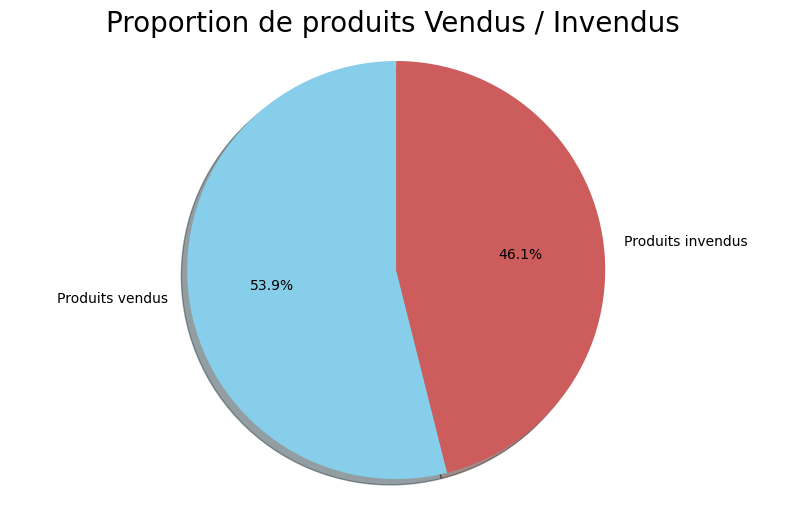

In [75]:
plt.figure(figsize=(10,6))

labels = 'Produits vendus', "Produits invendus"
sizes = [(df_last['total_sales'] > 0.0).sum(),(df_last['total_sales'] == 0.0).sum()]
colors = ['skyblue', 'indianred']

plt.title("Proportion de produits Vendus / Invendus ", size = 20)

plt.pie(sizes, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=90)

plt.axis('equal')

plt.show()

**Top et flops des ventes de produits :**

In [76]:
top_50 = df_last.sort_values(by='total_sales',ascending=False).head(50)

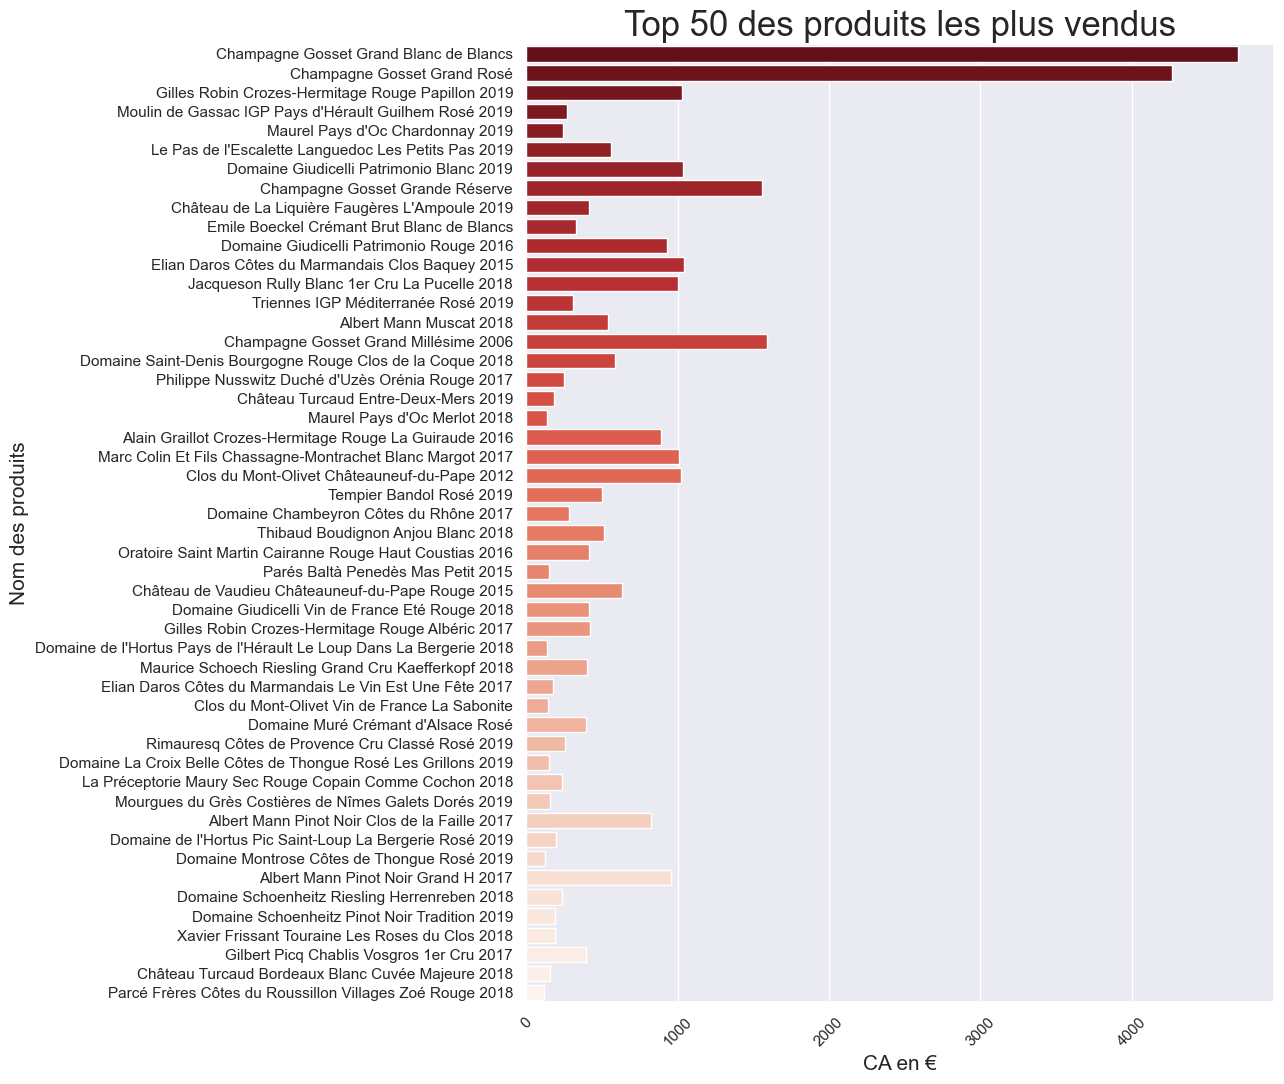

In [77]:
plt.figure(figsize=(13,11))

sns.set_theme(style = "darkgrid")

sns.barplot(x=top_50['CA'], 
            y=top_50['post_title'], palette="Reds_r")
plt.xlabel('CA en €', fontsize=15)
plt.ylabel("Nom des produits", fontsize=15)
plt.title("Top 50 des produits les plus vendus", fontsize=25)
plt.xticks(rotation= 45)

plt.tight_layout()


plt.show()

In [78]:
flop_50 = df_last[df_last['total_sales']>0]

In [79]:
flop_50 =  flop_50.sort_values(by='total_sales').head(50)

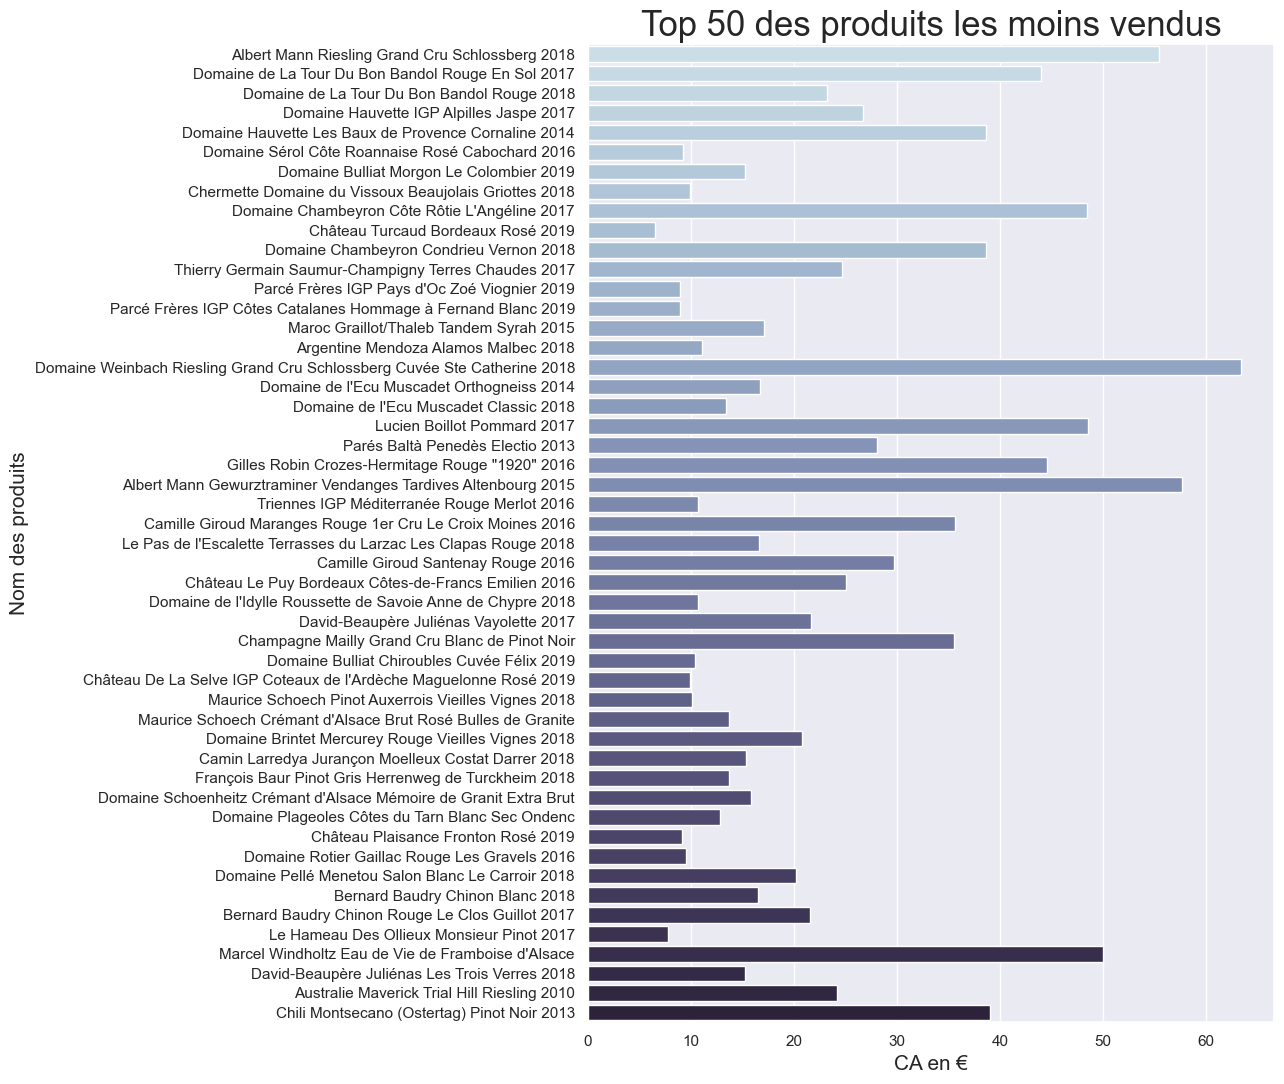

In [80]:
plt.figure(figsize=(13,11))

sns.set_theme(style = "darkgrid")

sns.barplot(x=flop_50['CA'], 
            y=flop_50['post_title'], palette="ch:s=.25,rot=-.25")
plt.xlabel('CA en €', fontsize=15)
plt.ylabel("Nom des produits", fontsize=15)
plt.title("Top 50 des produits les moins vendus", fontsize=25)

plt.tight_layout()


plt.show()

## <font color='green'> 2. Etude de la variable prix (représentation et détection des outliers) </font>

### <font color='blue'>A) Etude de la variable prix avec la méthode Z score </font>

* On considère que les outliers s'écartent de la moyenne au-delà de 2 fois l'écart-type ou standard déviation (donc pour un z_score >2 ou <-2)


On créer les colonnes z score : (prix - prix moyen) / standard déviation 

In [81]:
df_last['zscore_prix'] = (df_last['price'] - df_last['price'].mean())/df_last['price'].std()

In [82]:
df_last

,product_id,onsale_web,price,stock_quantity,stock_status,id_web,average_rating,total_sales,tax_status,post_author,...,post_modified,post_modified_gmt,post_parent,guid,menu_order,post_type,post_mime_type,comment_count,CA,zscore_prix
0,3847,1,24.2,0,outofstock,15298,0.0,6.0,taxable,2.0,...,2019-12-30 09:30:29,2019-12-30 08:30:29,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0,145.2,-0.298201
1,3849,1,34.3,0,outofstock,15296,0.0,0.0,taxable,2.0,...,2019-12-21 09:00:17,2019-12-21 08:00:17,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0,0.0,0.064970
2,3850,1,20.8,0,outofstock,15300,0.0,0.0,taxable,2.0,...,2020-06-26 18:15:03,2020-06-26 16:15:03,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0,0.0,-0.420457
3,4032,1,14.1,0,outofstock,19814,0.0,3.0,taxable,2.0,...,2020-01-04 16:36:01,2020-01-04 15:36:01,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0,42.3,-0.661373
4,4039,1,46.0,0,outofstock,19815,0.0,0.0,taxable,2.0,...,2020-01-04 16:36:10,2020-01-04 15:36:10,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0,0.0,0.485674
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
910,6930,1,8.4,83,instock,16135,0.0,5.0,taxable,2.0,...,2020-08-26 17:35:03,2020-08-26 15:35:03,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0,42.0,-0.866332
911,7023,1,27.5,15,instock,15891,0.0,0.0,taxable,2.0,...,2020-08-26 17:35:02,2020-08-26 15:35:02,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0,0.0,-0.179541
912,7025,1,69.0,2,instock,15887,0.0,0.0,taxable,2.0,...,2020-08-14 18:15:03,2020-08-14 16:15:03,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0,0.0,1.312700
913,7247,1,54.8,23,instock,13127-1,0.0,0.0,taxable,2.0,...,2020-07-20 17:09:06,2020-07-20 15:09:06,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0,0.0,0.802101


**On détermine les valeurs seuil :**

In [83]:
print("Valeurs seuil négative du prix = ",df_last['price'].mean() - (2*df_last['price'].std(ddof=0)))
print("Valeurs seuil positive du prix = ",df_last['price'].mean() + (2*df_last['price'].std(ddof=0)))

Valeurs seuil négative du prix =  -23.088948627103903
Valeurs seuil positive du prix =  88.07522313690784


<font color='red'>On ne garde que la valeur seuil positive car un prix ne peut être négatif.</font>

**On créer les DataFrame qui vont contenir les outliers :**

In [84]:
outliers_prix = df_last[df_last['zscore_prix']>2]

In [85]:
print('Il y a ',len(outliers_prix),'outliers sur',len(df_last['zscore_prix']),'valeurs.')
print("Cela correspond à ",(len(outliers_prix)*100)/len(df_last['zscore_prix']),"% de l'effectif")

Il y a  30 outliers sur 714 valeurs.
Cela correspond à  4.201680672268908 % de l'effectif


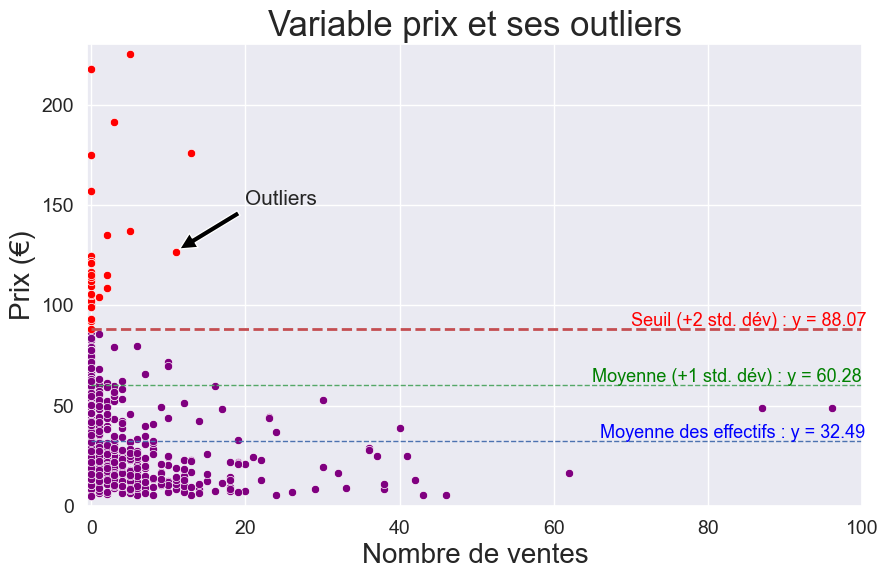

In [88]:
fig = plt.figure(figsize=(10,6))

sns.set_theme(style = "darkgrid")

seuil = df_last['price'].mean() + df_last['price'].std(ddof=0)*2
moy = df_last['price'].mean()
moy_std = df_last['price'].mean() + df_last['price'].std(ddof=0)

a = sns.scatterplot(
    x=df_last['total_sales'],
    y=df_last['price'],
    color = 'purple'
    )

sns.scatterplot(
    x=outliers_prix['total_sales'],
    y=outliers_prix['price'],
    color = 'red')

# la droite seuil
plt.plot([0.0,100.0],[seuil,seuil],'r--', lw=2)
plt.plot([0.0,100.0],[moy,moy],'b--', lw=1)
plt.plot([0.0,100.0],[moy_std,moy_std],'g--', lw=1)



a.annotate('Outliers', xy=(11,127), xytext=(20,150),size=15,    # Pour la flèche légendée
            arrowprops=dict(facecolor='black', shrink=0.05))

plt.xlabel('Nombre de ventes', fontsize = 20)
plt.ylabel('Prix (€)', fontsize = 20)


plt.xticks(fontsize=14)
plt.yticks(fontsize=14)


a.text(70,90, 'Seuil (+2 std. dév) : y = 88.07',fontsize=13, color='red')
a.text(66,34,  'Moyenne des effectifs : y = 32.49',fontsize=13, color='blue')
a.text(65,62, 'Moyenne (+1 std. dév) : y = 60.28',fontsize=13, color='green')


plt.title('Variable prix et ses outliers', size = 25)

plt.axis([-0.5,100.0,0.0,230]) # limite la valeur d'affichage des abscisses et ordonnées

plt.show()

### <font color='blue'>B) Etude de la variable prix avec la méthode des interquartiles </font>

**Calcul des quartiles et interquartiles :**

In [89]:
Q1 = np.percentile(df_last['price'], 25)
print("Quartile Q1 vaut : ", Q1)

Quartile Q1 vaut :  14.1


In [90]:
Q3 = np.percentile(df_last['price'],75)
print("Quartile Q3 vaut : ", Q3)

Quartile Q3 vaut :  42.175000000000004


In [91]:
print("L ecart interquartile vaut Q3 - Q1 = ", Q3 - Q1)

L ecart interquartile vaut Q3 - Q1 =  28.075000000000003


**Calcul de la borne supérieure : Mise en évidence des valeurs aberrantes**

In [92]:
print('Borne supérieure =',Q3 + 1.5* (Q3-Q1))

Borne supérieure = 84.28750000000001


**On isole les prix pour lesquels le prix est >=84.2 € :**

In [93]:
outliers_interquartile = df_last[df_last['price']>=84.28]

In [94]:
print('Il y a ',len(outliers_interquartile),' outliers')
print("Cela correspond à ",(len(outliers_interquartile)*100)/len(df_last['zscore_prix']),"% de l'effectif")

Il y a  32  outliers
Cela correspond à  4.481792717086835 % de l'effectif


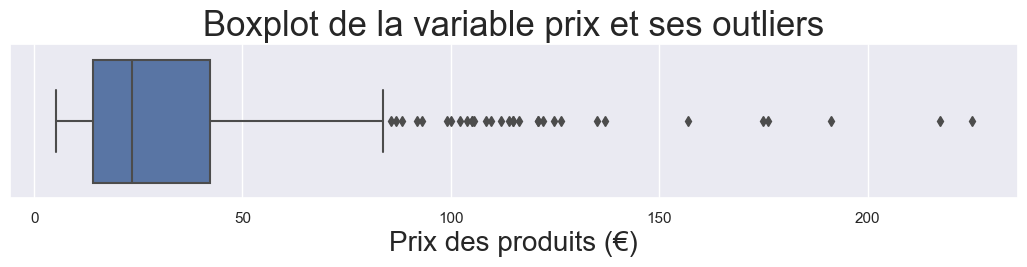

In [95]:
fig = plt.figure(figsize=(13,2))

sns.set_theme(style = "darkgrid")

ax = sns.boxplot(x=df_last['price'])

plt.title('Boxplot de la variable prix et ses outliers', size = 25)
plt.xlabel('Prix des produits (€)', fontsize = 20)


plt.show()

**On obtiens à peu prêt le même résultat qu'avec la méthode zscore**

### <font color='blue'>C) Vérification des outliers </font>

* **Methode z_score : 30 Outliers**
* **Methode interquatiles : 32 Outliers**

**On verifie les outliers :** 

In [96]:
outliers_interquartile.sort_values(by='price',ascending=False)

,product_id,onsale_web,price,stock_quantity,stock_status,id_web,average_rating,total_sales,tax_status,post_author,...,post_modified,post_modified_gmt,post_parent,guid,menu_order,post_type,post_mime_type,comment_count,CA,zscore_prix
382,4352,1,225.0,0,outofstock,15940,0.0,5.0,taxable,2.0,...,2020-03-07 11:18:45,2020-03-07 10:18:45,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0,1125.0,6.922087
616,5001,1,217.5,20,instock,14581,0.0,0.0,taxable,2.0,...,2020-05-16 09:00:05,2020-05-16 07:00:05,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0,0.0,6.652405
783,5892,1,191.3,10,instock,14983,0.0,3.0,taxable,2.0,...,2020-04-01 09:30:09,2020-04-01 07:30:09,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0,573.9,5.710315
401,4402,1,176.0,8,instock,3510,0.0,13.0,taxable,2.0,...,2020-08-22 11:35:03,2020-08-22 09:35:03,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0,2288.0,5.160164
748,5767,1,175.0,12,instock,15185,0.0,0.0,taxable,2.0,...,2020-06-11 15:25:04,2020-06-11 13:25:04,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0,0.0,5.124206
404,4406,1,157.0,3,instock,7819,0.0,0.0,taxable,2.0,...,2020-03-14 16:05:04,2020-03-14 15:05:04,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0,0.0,4.476969
569,4904,1,137.0,13,instock,14220,0.0,5.0,taxable,2.0,...,2020-05-19 17:15:02,2020-05-19 15:15:02,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0,685.0,3.757817
843,6126,1,135.0,10,instock,14923,0.0,2.0,taxable,2.0,...,2020-08-27 11:45:02,2020-08-27 09:45:02,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0,270.0,3.685902
384,4355,1,126.5,2,instock,12589,0.0,11.0,taxable,2.0,...,2020-08-13 10:15:02,2020-08-13 08:15:02,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0,1391.5,3.380262
706,5612,1,124.8,12,instock,14915,0.0,0.0,taxable,2.0,...,2019-01-23 09:33:57,2019-01-23 08:33:57,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0,0.0,3.319134


In [97]:
outliers_prix.sort_values(by='price',ascending=False)

,product_id,onsale_web,price,stock_quantity,stock_status,id_web,average_rating,total_sales,tax_status,post_author,...,post_modified,post_modified_gmt,post_parent,guid,menu_order,post_type,post_mime_type,comment_count,CA,zscore_prix
382,4352,1,225.0,0,outofstock,15940,0.0,5.0,taxable,2.0,...,2020-03-07 11:18:45,2020-03-07 10:18:45,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0,1125.0,6.922087
616,5001,1,217.5,20,instock,14581,0.0,0.0,taxable,2.0,...,2020-05-16 09:00:05,2020-05-16 07:00:05,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0,0.0,6.652405
783,5892,1,191.3,10,instock,14983,0.0,3.0,taxable,2.0,...,2020-04-01 09:30:09,2020-04-01 07:30:09,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0,573.9,5.710315
401,4402,1,176.0,8,instock,3510,0.0,13.0,taxable,2.0,...,2020-08-22 11:35:03,2020-08-22 09:35:03,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0,2288.0,5.160164
748,5767,1,175.0,12,instock,15185,0.0,0.0,taxable,2.0,...,2020-06-11 15:25:04,2020-06-11 13:25:04,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0,0.0,5.124206
404,4406,1,157.0,3,instock,7819,0.0,0.0,taxable,2.0,...,2020-03-14 16:05:04,2020-03-14 15:05:04,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0,0.0,4.476969
569,4904,1,137.0,13,instock,14220,0.0,5.0,taxable,2.0,...,2020-05-19 17:15:02,2020-05-19 15:15:02,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0,685.0,3.757817
843,6126,1,135.0,10,instock,14923,0.0,2.0,taxable,2.0,...,2020-08-27 11:45:02,2020-08-27 09:45:02,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0,270.0,3.685902
384,4355,1,126.5,2,instock,12589,0.0,11.0,taxable,2.0,...,2020-08-13 10:15:02,2020-08-13 08:15:02,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0,1391.5,3.380262
706,5612,1,124.8,12,instock,14915,0.0,0.0,taxable,2.0,...,2019-01-23 09:33:57,2019-01-23 08:33:57,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0,0.0,3.319134


### Conclusion :

**Après quelques recherches , en comparant les noms des bouteilles avec les prix qui se font sur le marché, on constate que le prix des bouteilles ne sont pas aberrants. On peut donc considérer que ce ne sont pas des Outliers à proprement parlé.**